# Predicions on bike's future usage

## Preprocessing

Import libraries

In [151]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv1D, MaxPool1D, ReLU, LeakyReLU, ELU,\
Input, Flatten, Reshape, Concatenate, Dropout, Reshape, Conv2D, MaxPooling2D, Lambda, BatchNormalization,\
GRU, Bidirectional, TimeDistributed, Softmax

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, MSE
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.model_selection import train_test_split

from random import randint, uniform, choice
from matplotlib.pyplot import figure

import xgboost
from lightgbm import LGBMRegressor

from sklearn.metrics import confusion_matrix

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the dataset

In [78]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Hackathon IA/Datasets/Traffic Prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Hackathon IA/Datasets/Traffic Prediction/X_dev.csv
/content/drive/MyDrive/Hackathon IA/Datasets/Traffic Prediction/Y_dev.csv
/content/drive/MyDrive/Hackathon IA/Datasets/Traffic Prediction/Y_test.csv
/content/drive/MyDrive/Hackathon IA/Datasets/Traffic Prediction/Y_train.csv
/content/drive/MyDrive/Hackathon IA/Datasets/Traffic Prediction/X_test.csv
/content/drive/MyDrive/Hackathon IA/Datasets/Traffic Prediction/X_train.csv


In [79]:
X_train = pd.read_csv('/content/drive/MyDrive/Hackathon IA/Datasets/Traffic Prediction/X_train.csv',header=None).values
X_dev = pd.read_csv('/content/drive/MyDrive/Hackathon IA/Datasets/Traffic Prediction/X_dev.csv',header=None).values
X_test = pd.read_csv('/content/drive/MyDrive/Hackathon IA/Datasets/Traffic Prediction/X_test.csv',header=None).values
y_train = pd.read_csv('/content/drive/MyDrive/Hackathon IA/Datasets/Traffic Prediction/Y_train.csv',header=None).values
y_dev = pd.read_csv('/content/drive/MyDrive/Hackathon IA/Datasets/Traffic Prediction/Y_dev.csv',header=None).values
y_test = pd.read_csv('/content/drive/MyDrive/Hackathon IA/Datasets/Traffic Prediction/Y_test.csv',header=None).values

In [80]:
n_stations = y_train.shape[1]//2

In [81]:
print(X_train.shape, y_train.shape)
print(X_dev.shape, y_dev.shape)
print(X_test.shape, y_test.shape)

(234645, 160) (234639, 136)
(13492, 160) (13496, 136)
(13607, 160) (13599, 136)


In [82]:
X_train = X_train[:234639,:]
y_dev = y_dev[:13492,:]
X_test = X_test[:13599,:]

## Prediction one the whole dataset

The Naïve prediction : prediction = the number of docks and bikes one hour before

In [ ]:
y_pred = X_dev[:,:2*n_stations]
mse = ((y_pred - y_dev)**2).mean()
mse

2.290998151409986

A simple linear model

In [ ]:
x_in = Input((X_train.shape[1]))
x = Dense(y_train.shape[1])(x_in)
lin_model = Model(inputs=x_in, outputs=x)

In [ ]:
lin_model.compile(loss='mse', optimizer='adam')
lin_model.fit(X_train,y_train,validation_data=(X_dev,y_dev),epochs=10)

Epoch 1/10
7333/7333 [==============================] - 14s 2ms/step - loss: 16.9253 - val_loss: 2.3181
Epoch 2/10
7333/7333 [==============================] - 11s 2ms/step - loss: 2.2818 - val_loss: 2.2927
Epoch 3/10
7333/7333 [==============================] - 11s 2ms/step - loss: 2.2610 - val_loss: 2.3317
Epoch 4/10
7333/7333 [==============================] - 11s 2ms/step - loss: 2.2524 - val_loss: 2.2279
Epoch 5/10
7333/7333 [==============================] - 11s 2ms/step - loss: 2.2580 - val_loss: 2.2549
Epoch 6/10
7333/7333 [==============================] - 11s 2ms/step - loss: 2.2442 - val_loss: 2.3046
Epoch 7/10
7333/7333 [==============================] - 11s 2ms/step - loss: 2.2490 - val_loss: 2.3652
Epoch 8/10
7333/7333 [==============================] - 11s 2ms/step - loss: 2.2470 - val_loss: 2.3007
Epoch 9/10
7333/7333 [==============================] - 11s 2ms/step - loss: 2.2511 - val_loss: 2.3407
Epoch 10/10
7333/7333 [==============================] - 11s 2ms/step - 

A more complex neural network

In [ ]:
x_in = Input((X_train.shape[1]))
x = Dense(512,activation='relu')(x_in)
x = Dropout(0.2)(x)
#x = Dense(248,activation='tanh')(x)
x = Dense(348,activation='relu')(x)
x = Dense(y_train.shape[1])(x)
model = Model(inputs=x_in, outputs=x)

In [ ]:
clb = [ReduceLROnPlateau()]
model.compile(loss='mse', optimizer=Adam(lr = 0.001))
model.fit(X_train,y_train,validation_data=(X_dev,y_dev),epochs=40, shuffle=True, batch_size=32, callbacks=clb)

Epoch 1/40
7333/7333 [==============================] - 16s 2ms/step - loss: 7.2785 - val_loss: 2.8100
Epoch 2/40
7333/7333 [==============================] - 16s 2ms/step - loss: 3.3360 - val_loss: 3.4574
Epoch 3/40
7333/7333 [==============================] - 16s 2ms/step - loss: 2.9610 - val_loss: 3.1533
Epoch 4/40
7333/7333 [==============================] - 16s 2ms/step - loss: 2.7796 - val_loss: 3.1871
Epoch 5/40
7333/7333 [==============================] - 16s 2ms/step - loss: 2.6791 - val_loss: 2.9829
Epoch 6/40
7333/7333 [==============================] - 16s 2ms/step - loss: 2.6067 - val_loss: 3.1532
Epoch 7/40
7333/7333 [==============================] - 16s 2ms/step - loss: 2.5610 - val_loss: 3.2576
Epoch 8/40
7333/7333 [==============================] - 16s 2ms/step - loss: 2.5191 - val_loss: 3.2872
Epoch 9/40
7333/7333 [==============================] - 16s 2ms/step - loss: 2.4960 - val_loss: 3.1083
Epoch 10/40
7333/7333 [==============================] - 16s 2ms/step - l

Using gradient boosting

In [ ]:
#lgbm = LGBMRegressor(random_state=1,reg_lambda=10,reg_alpha=1,n_estimators=128,num_leaves=32)
lgbm = LGBMRegressor(random_state=1)
#xgb.fit(X_train, y_train)
mses = 0
mses_train = 0
for i in range(y_train.shape[1]):
    if i%10==0:print(i)
    lgbm.fit(X_train,y_train[:,i])
    y_pred0 = lgbm.predict(X_dev)
    mse = ((y_pred0 - y_dev[:,i])**2).mean()
    mses+=mse
    y_pred0 = lgbm.predict(X_train)
    mse = ((y_pred0 - y_train[:,i])**2).mean()
    mses_train+=mse
    print(mses/(i+1))
    print(mses_train/(i+1))
print(mses/y_train.shape[1])
print(mses_train/y_train.shape[1])


0
2.48130954535017
0.9823712972059154
2.5301772674143477
0.981946697369153
1.80747459261857
0.7131428762002278
1.446852312625926
0.5789408328801908
1.268676446790774
0.5251346230719809
1.147057678382193
0.49011093364999997
1.013873084886794
0.4346238648973464
0.9141455000899861
0.39305124428271676
0.8917912047022146
0.38897721805771635
0.8717382842009119
0.38543587062974827
10
0.832296167047505
0.372382301458965
0.7988751467188234
0.3616774203237763
0.7608208714360866
0.34784902782848115
0.728746693912365
0.3361765020761564
0.7123617323995316
0.326765589820862
0.6978895811611938
0.31867084581976385
0.7069338175229581
0.32093040971254333
0.7149646647255964
0.3225775513340865
0.7080382743301011
0.32543826260403275
0.7035693555961728
0.3278685753659365
20
0.6901279779578036
0.3272609564096612
0.6776963710584117
0.32652084770462586
0.6624527537023255
0.319070001783483
0.6482243282236881
0.3122182422243312
0.6341777634103667
0.3068343166939737
0.6208302640980171
0.3018234778412649
0.6152539

### Improving the perfomance using only one cluster of bike sharing

Restricting the data

In [ ]:
n_stations

68

In [83]:
san_francisco  = [45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,
 61,63,31,32,33,34,35,36,37,38,39,40,41,42,43,44,62,65]

In [84]:
def reduce(X, y):
    print(list(range(2*n_stations, X_train.shape[1])))
    X_slice = [2*x for x in san_francisco] + [2*x+1 for x in san_francisco] + list(range(2*n_stations, X_train.shape[1]))
    print(X_slice)
    y_slice = [2*x for x in san_francisco] + [2*x+1 for x in san_francisco]
    return X[:, X_slice], y[:, y_slice]

In [85]:
X_trainr, y_trainr = reduce(X_train,y_train)
X_devr, y_devr = reduce(X_dev,y_dev)
X_testr, y_testr = reduce(X_test,y_test)

[136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]
[90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 126, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 124, 130, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 127, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 125, 131, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]
[136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]
[90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 126, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 124, 130, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 127, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 125, 131, 136, 137, 138, 139, 140, 141, 14

In [86]:
y_trainr.shape, len(san_francisco)

((234639, 68), 34)

In [87]:
n_stationsr = len(san_francisco)

All the simple predictions again

In [ ]:
y_pred = X_devr[:,:2*n_stationsr]
mse = ((y_pred - y_devr)**2).mean()
mse

4.1089349243996445

A simple linear model

In [ ]:
x_in = Input((X_trainr.shape[1]))
x = Dense(y_trainr.shape[1])(x_in)
lin_model = Model(inputs=x_in, outputs=x)

In [ ]:
lin_model.compile(loss='mse', optimizer='adam')
lin_model.fit(X_trainr,y_trainr,validation_data=(X_devr,y_devr),epochs=10)

Epoch 1/10
7333/7333 [==============================] - 12s 2ms/step - loss: 50.3298 - val_loss: 4.1002
Epoch 2/10
7333/7333 [==============================] - 12s 2ms/step - loss: 4.0404 - val_loss: 4.0352
Epoch 3/10
7333/7333 [==============================] - 12s 2ms/step - loss: 3.9799 - val_loss: 3.9639
Epoch 4/10
7333/7333 [==============================] - 12s 2ms/step - loss: 3.9725 - val_loss: 3.9595
Epoch 5/10
7333/7333 [==============================] - 12s 2ms/step - loss: 3.9968 - val_loss: 3.8938
Epoch 6/10
7333/7333 [==============================] - 12s 2ms/step - loss: 3.9848 - val_loss: 3.9040
Epoch 7/10
7333/7333 [==============================] - 12s 2ms/step - loss: 3.9838 - val_loss: 3.9467
Epoch 8/10
7333/7333 [==============================] - 12s 2ms/step - loss: 3.9655 - val_loss: 3.9148
Epoch 9/10
7333/7333 [==============================] - 12s 2ms/step - loss: 3.9648 - val_loss: 3.9428
Epoch 10/10
7333/7333 [==============================] - 12s 2ms/step - 

A more complex neural network

In [ ]:
x_in = Input((X_trainr.shape[1]))
x = Dense(248,activation='relu')(x_in)
x = Dropout(0.2)(x)
#x = Dense(248,activation='tanh')(x)
x = Dense(248,activation='relu')(x)
x = Dense(y_trainr.shape[1])(x)
model = Model(inputs=x_in, outputs=x)

In [ ]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 92)]              0         
_________________________________________________________________
dense_13 (Dense)             (None, 248)               23064     
_________________________________________________________________
dropout_3 (Dropout)          (None, 248)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 248)               61752     
_________________________________________________________________
dense_15 (Dense)             (None, 68)                16932     
Total params: 101,748
Trainable params: 101,748
Non-trainable params: 0
_________________________________________________________________


In [ ]:
clb = [ReduceLROnPlateau()]
model.compile(loss='mse', optimizer=Adam(lr = 0.001))
model.fit(X_trainr,y_trainr,validation_data=(X_devr,y_devr),epochs=40, shuffle=True, batch_size=32, callbacks=clb)

Epoch 1/40
7333/7333 [==============================] - 14s 2ms/step - loss: 11.9135 - val_loss: 6.3863
Epoch 2/40
7333/7333 [==============================] - 14s 2ms/step - loss: 5.2138 - val_loss: 6.0448
Epoch 3/40
7333/7333 [==============================] - 14s 2ms/step - loss: 4.7453 - val_loss: 5.9602
Epoch 4/40
7333/7333 [==============================] - 14s 2ms/step - loss: 4.5128 - val_loss: 6.0616
Epoch 5/40
7333/7333 [==============================] - 14s 2ms/step - loss: 4.4022 - val_loss: 6.2801
Epoch 6/40
7333/7333 [==============================] - 14s 2ms/step - loss: 4.3298 - val_loss: 6.2703
Epoch 7/40
7333/7333 [==============================] - 14s 2ms/step - loss: 4.2862 - val_loss: 6.0434
Epoch 8/40
7333/7333 [==============================] - 14s 2ms/step - loss: 4.2264 - val_loss: 6.1553
Epoch 9/40
7333/7333 [==============================] - 14s 2ms/step - loss: 4.2070 - val_loss: 6.2029
Epoch 10/40
7333/7333 [==============================] - 14s 2ms/step - 

Using gradient boosting

In [ ]:
#lgbm = LGBMRegressor(random_state=1,reg_lambda=10,reg_alpha=1,n_estimators=128,num_leaves=32)
lgbm = LGBMRegressor(random_state=1)
#xgb.fit(X_train, y_train)
mses = 0
mses_train = 0
for i in range(y_trainr.shape[1]):
    if i%10==0:print(i)
    lgbm.fit(X_trainr,y_trainr[:,i])
    y_pred0 = lgbm.predict(X_devr)
    mse = ((y_pred0 - y_devr[:,i])**2).mean()
    mses+=mse
    y_pred0 = lgbm.predict(X_trainr)
    mse = ((y_pred0 - y_trainr[:,i])**2).mean()
    mses_train+=mse
    print(mses/(i+1))
    print(mses_train/(i+1))
print(' ')
print(mses/y_trainr.shape[1])
print(mses_train/y_trainr.shape[1])


0
1.365678800730138
0.755893797228874
3.257883953684555
1.8537763144942279
3.807468404373752
2.2334613249995385
3.919035027796018
2.0719349442400783
3.7729340552938666
1.9352573047562927
3.8726829378459975
1.9461539738352869
3.874398231601678
1.96195804921643
3.726926688853222
1.8970405764637701
3.804661440686367
1.8827457007713602
3.7551335534596575
1.8364563077536946
10
4.086876446143804
1.9858236155299196
4.472956125130675
2.2517352263761103
4.379602692872279
2.1898691331500952
4.287441958943702
2.1379519429629856
4.212745789091553
2.1294835328086004
4.162877463574724
2.1233133482528617
4.022081599183677
2.0617360119938564
4.113971751209224
2.0954364339130893
3.964300536449371
2.0329421256922977
3.8834704127226303
1.9978133251329915
20
3.760626333317949
1.9415065748239417
3.669217287272474
1.8943258831567713
3.629520454055797
1.8786018961646045
3.5648811978001156
1.852689793694327
3.7359580403900363
1.9461852566471947
3.7556050007823987
1.9471457388105908
3.7395261603027996
1.936068

## Visualisation of the errors

In [88]:
n_stations

68

In [89]:
available_slice = [2*x for x in range(n_stations)]
deltas = y_dev[:,available_slice] - X_dev[:,available_slice]

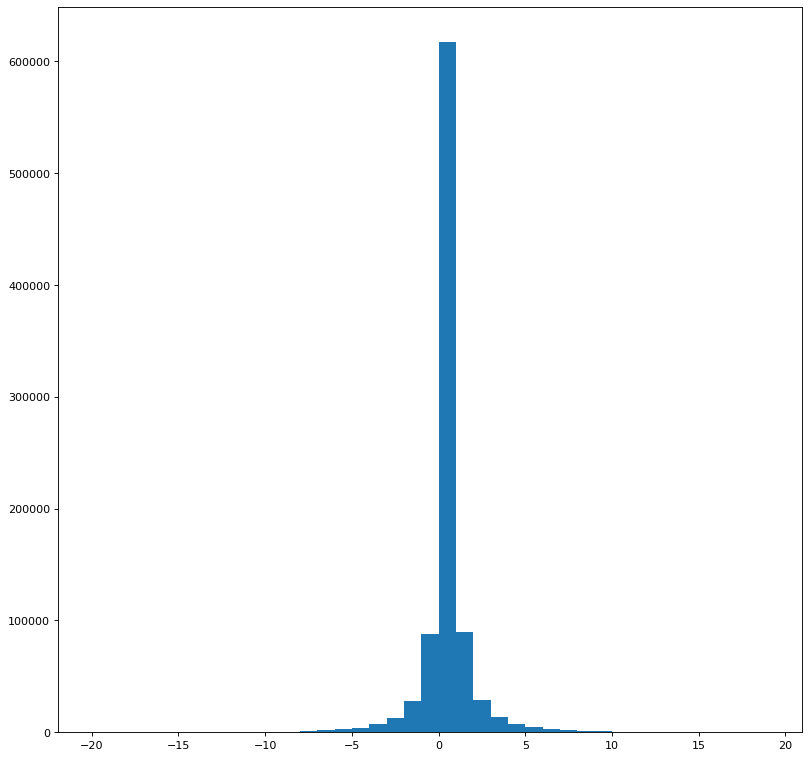

In [90]:
figure(figsize=(12, 12), dpi=80)
deltas = deltas.reshape((-1))
plt.hist(deltas, bins=range(-20,20))
plt.show()

In [91]:
print(min(deltas),max(deltas))

-18.0 24.0


## Distribution

In [ ]:
a = np.array([1,2,3,4])
print(a.reshape((2,2)))

[[1 2]
 [3 4]]


In [92]:
def reshape(X,y):
    return X[:,:2*n_stationsr].reshape((-1,n_stationsr,2)), y.reshape((-1,n_stationsr,2))

In [93]:
X_traind, y_traind = reshape(X_trainr, y_trainr)
X_devd, y_devd = reshape(X_devr, y_devr)

In [ ]:
x_in = Input((n_stationsr,2))
summary = Flatten()(x_in)
summary = Dense(64)(summary)
l = []
for i in range(n_stationsr):
    l.append(summary)
print(summary.shape)
summary = Concatenate(axis=1)(l)
print(summary.shape)
summary = Reshape((n_stationsr,-1))(summary)
print(summary.shape)
x = Concatenate(axis=2)([x_in, summary])
x = TimeDistributed(Dense(32))(x)
x = TimeDistributed(Dense(2))(x)
#x = Reshape((n_stationsr,2))(x)
d_model = Model(inputs=x_in, outputs=x)

(None, 64)
(None, 2176)
(None, 34, 64)


In [ ]:
d_model.compile(optimizer='adam',loss='mse')
d_model.fit(X_traind,y_traind,validation_data=(X_devd,y_devd),epochs=40, shuffle=True, batch_size=32, callbacks=clb)

Epoch 1/40
7333/7333 [==============================] - 17s 2ms/step - loss: 7.7715 - val_loss: 3.9090
Epoch 2/40
7333/7333 [==============================] - 17s 2ms/step - loss: 4.0690 - val_loss: 3.9124
Epoch 3/40
7333/7333 [==============================] - 17s 2ms/step - loss: 4.0611 - val_loss: 3.9033
Epoch 4/40
7333/7333 [==============================] - 16s 2ms/step - loss: 4.0583 - val_loss: 3.9018
Epoch 5/40
7333/7333 [==============================] - 16s 2ms/step - loss: 4.0539 - val_loss: 3.9007
Epoch 6/40
7333/7333 [==============================] - 16s 2ms/step - loss: 4.0719 - val_loss: 3.9016
Epoch 7/40
7333/7333 [==============================] - 16s 2ms/step - loss: 4.0756 - val_loss: 3.9033
Epoch 8/40
7333/7333 [==============================] - 16s 2ms/step - loss: 4.0570 - val_loss: 3.9001
Epoch 9/40
7333/7333 [==============================] - 16s 2ms/step - loss: 4.0485 - val_loss: 3.9024
Epoch 10/40
7333/7333 [==============================] - 17s 2ms/step - l

KeyboardInterrupt: ignored

In [124]:
y_trainc = y_traind - X_traind
y_devc = y_devd - X_devd

In [130]:
x_in = Input((n_stationsr,2))
x = Bidirectional(GRU(32, return_sequences=True))(x_in)
x = Bidirectional(GRU(32, return_sequences=True))(x)
x = TimeDistributed(Dense(32,activation='relu'))(x)
x = TimeDistributed(Dense(2))(x)

gru_model = Model(inputs=x_in, outputs=x)

In [ ]:
gru_model.compile(optimizer='adam',loss='mse')
gru_model.fit(X_traind,y_trainc,validation_data=(X_devd,y_devc),epochs=100, shuffle=True, batch_size=1024)

Epoch 1/100
230/230 [==============================] - 9s 20ms/step - loss: 3.3353 - val_loss: 3.8228
Epoch 2/100
230/230 [==============================] - 4s 16ms/step - loss: 2.9536 - val_loss: 3.8786
Epoch 3/100
230/230 [==============================] - 4s 15ms/step - loss: 2.9540 - val_loss: 3.7417
Epoch 4/100
230/230 [==============================] - 4s 15ms/step - loss: 2.9629 - val_loss: 3.9385
Epoch 5/100
230/230 [==============================] - 4s 15ms/step - loss: 2.9365 - val_loss: 3.8003
Epoch 6/100
230/230 [==============================] - 4s 16ms/step - loss: 2.9270 - val_loss: 3.8407
Epoch 7/100
230/230 [==============================] - 4s 16ms/step - loss: 2.9361 - val_loss: 3.8449
Epoch 8/100
230/230 [==============================] - 4s 16ms/step - loss: 2.9248 - val_loss: 3.8104
Epoch 9/100
230/230 [==============================] - 4s 16ms/step - loss: 2.9280 - val_loss: 3.8730
Epoch 10/100
230/230 [==============================] - 4s 16ms/step - loss: 2.908

## Round and evaluate

In [ ]:
def round_and_evaluate(model, X, y):
    vround = np.vectorize(round)
    ypred = vround(model.predict(X))
    return ((ypred - y)**2).mean()

In [ ]:
round_and_evaluate(lin_model, X_devr, y_devr)

4.034182565703423

In [ ]:
round_and_evaluate(model, X_devr, y_devr)

4.598325151287909

In [ ]:
round_and_evaluate(d_model, X_devd, y_devd)

3.971181179260913

In [ ]:
round_and_evaluate(gru_model, X_devd, y_devd)

3.65851114385867

Old

In [ ]:
available_slicer = [2*x for x in range(n_stationsr)]
true_deltas = y_devr[:,available_slicer] - X_devr[:,available_slicer]
vround = np.vectorize(round)
ypred = vround(gru_model.predict(X_devd))
pred_deltas = ypred[:,:,0] - X_devr[:,available_slicer]

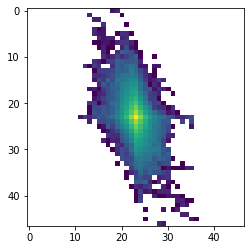

In [ ]:
cm = confusion_matrix(true_deltas.reshape((-1)), pred_deltas.reshape((-1)))
plt.imshow(cm, norm=matplotlib.colors.LogNorm())
plt.show()

New

In [148]:
available_slicer = [2*x for x in range(n_stationsr)]
vround = np.vectorize(round)
ypred = vround(gru_model.predict(X_devd))
pred_deltas = ypred[:,:,0]
true_deltas = y_devc[:,:,0]

In [152]:
extent=(np.min(true_deltas),np.max(true_deltas),np.min(pred_deltas),np.max(true_deltas))

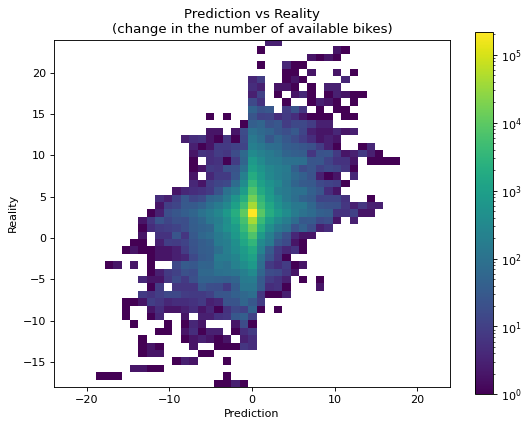

In [155]:
cm = confusion_matrix(true_deltas.reshape((-1)), pred_deltas.reshape((-1)))
figure(figsize=(8, 6), dpi=80)
plt.imshow(cm, origin='lower', norm=matplotlib.colors.LogNorm(), extent=extent)
plt.title('Prediction vs Reality\n(change in the number of available bikes)')
plt.xlabel('Prediction')
plt.ylabel('Reality')
plt.colorbar()
plt.show()